# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

# Loading the Data

In [6]:
# from google.colab import files
# upload = files.upload()


Saving creditcard.csv to creditcard.csv


In [2]:
data = pd.read_csv("creditcard.csv")

# Understanding the Data


In [3]:
# Grab a peek at the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


# Describing the Data

In [4]:
# print the shape of the data
# data = data.sample(frac = 0.1, random_state =48)
print(data.shape)
print(data.describe())

(11959, 31)
               Time            V1            V2            V3            V4  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean    8009.996822     -0.216230      0.277097      0.889505      0.282606   
std     6204.332248      1.583914      1.308884      1.331824      1.478162   
min        0.000000    -27.670569    -34.607649    -22.804686     -4.657545   
25%     2542.000000     -0.978944     -0.261503      0.417186     -0.622456   
50%     6662.000000     -0.340742      0.256346      0.951223      0.213029   
75%    12382.000000      1.161273      0.883626      1.613678      1.159141   
max    20642.000000      1.960497      9.092123      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  11959.000000  11959.000000  11959.000000  11959.000000  11959.000000   
mean      -0.086585      0.139986     -0.121943     -0.048727      0.911579   
std        1.191776      1.306285      

# imbalance in the data

Time to explain the data we are dealing with

In [5]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1 ]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Teansactions: {}'.format(len(data[data['Class'] ==0])))

0.004367545775239375
Fraud Cases: 52
Valid Teansactions: 11906


Only 0.17% fraudulent transaction out all the transactions. The data is highly Unbalanced. Lets first apply our models without balancing it and if we don't get a good accuracy then we can find a way to balance this dataset. But first, let's implement the model without it and will balance the data only if needed.

# print the amount details for Fraudulent Transaction

In [6]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


,Amount
count,52.000000
mean,97.724808
std,321.188775
min,0.000000
25%,1.000000
50%,1.000000
75%,1.772500
max,1809.680000


# Prin  the amount details for Normal Transaction

In [7]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


,Amount
count,11906.000000
mean,62.198127
std,177.379105
min,0.000000
25%,5.292500
50%,15.950000
75%,50.000000
max,7712.430000


As we can clearly notice from this, the average Money transaction for the fraudulent ones is more. This makes this problem crucial to deal with.

# Pltting the Correlation Matrix

The correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for prediction.

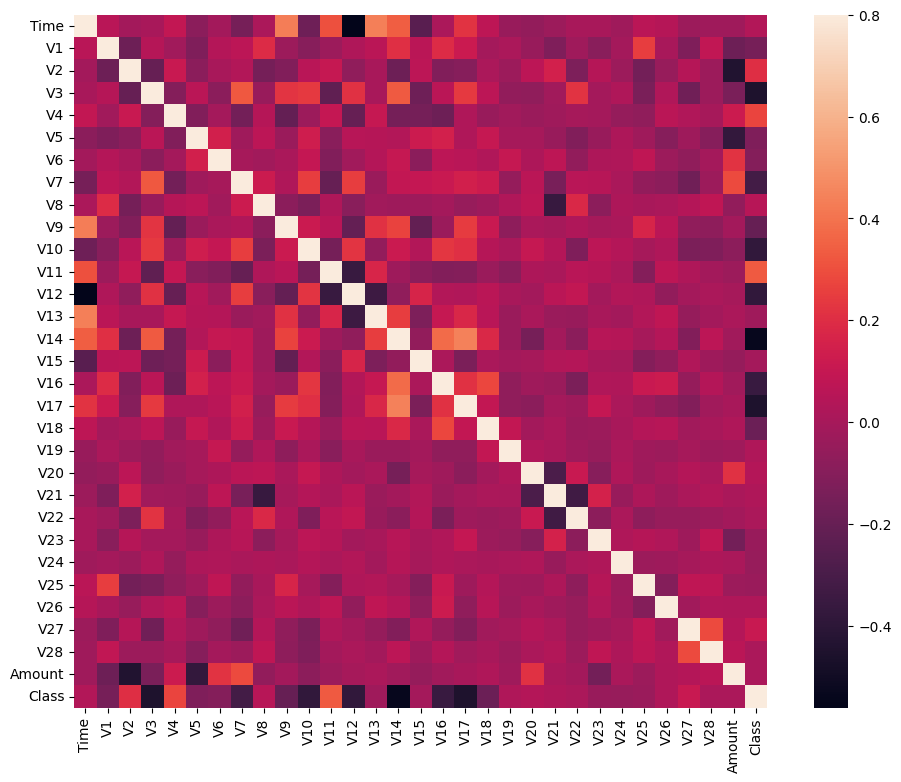

In [8]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negative correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

# Separating the X and the Y values

Dviding the data into inputs parameters and outputs value format

In [9]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(11959, 30)
(11959,)


# Training and Testing Data Bifuraction

We will be dividing the dataset into two main groups. One for training the model and the other for Testing our trained model's performance.

In [10]:
# Using scikit_Learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

# Building a Random Forest Model using scikit learn

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming xData and yData are defined somewhere above

# split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

# Create an imputer to fill missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
xTrain = imputer.fit_transform(xTrain)
xTest = imputer.transform(xTest)

# Building the Random Forest Classifier (RANDOM FOREST)
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

# predictions
yPred = rfc.predict(xTest)

# Building all kinds of evaluating parameters

In [17]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9991638795986622
The precision is 0.9
The recall is 0.9
The F1-Score is 0.9
The Matthews correlation coefficient is0.8995801847187238


# Visualizing the Confusion Matrix

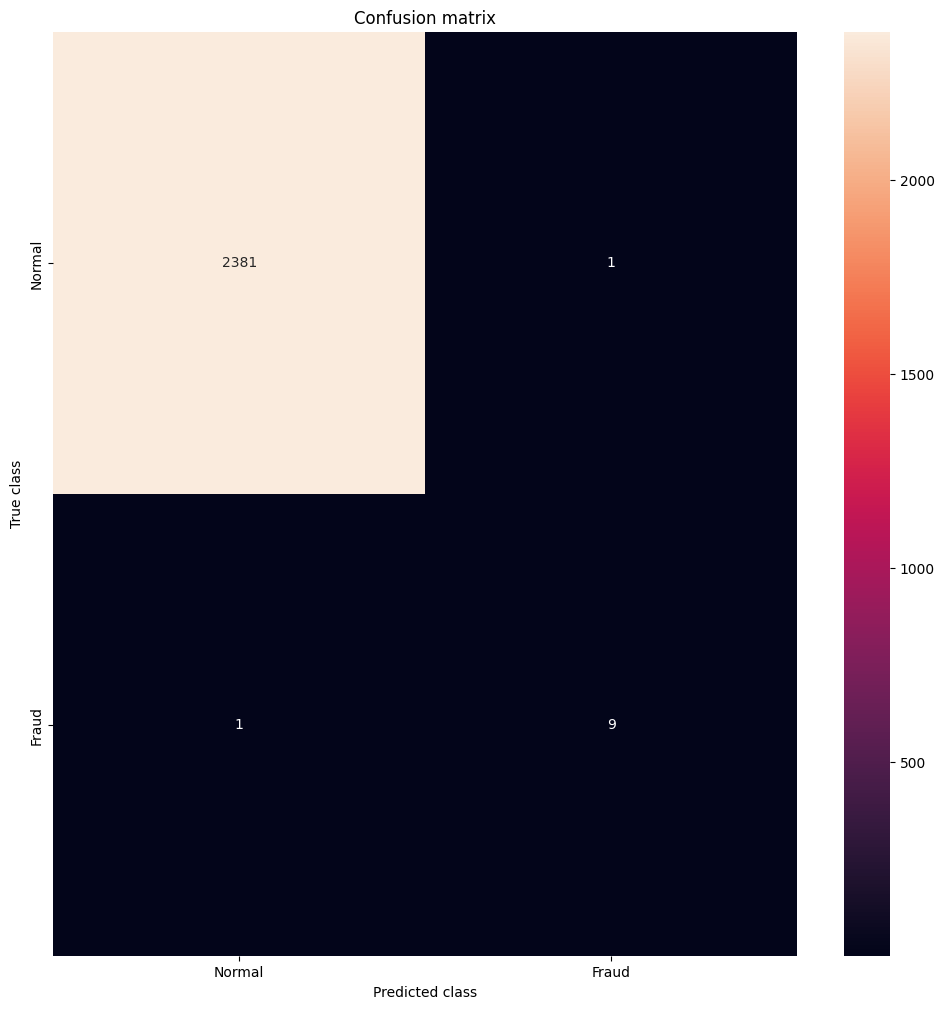

In [18]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
